### 결정트리(Decision trees)
분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능 한 머신러닝 알고리즘, 또한 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다.

### 결정트리 학습과 시작화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import os

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[: ,2:]# 꽃잎의 길이와 너비 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth =2)
tree_clf.fit(X , y)

DecisionTreeClassifier(max_depth=2)

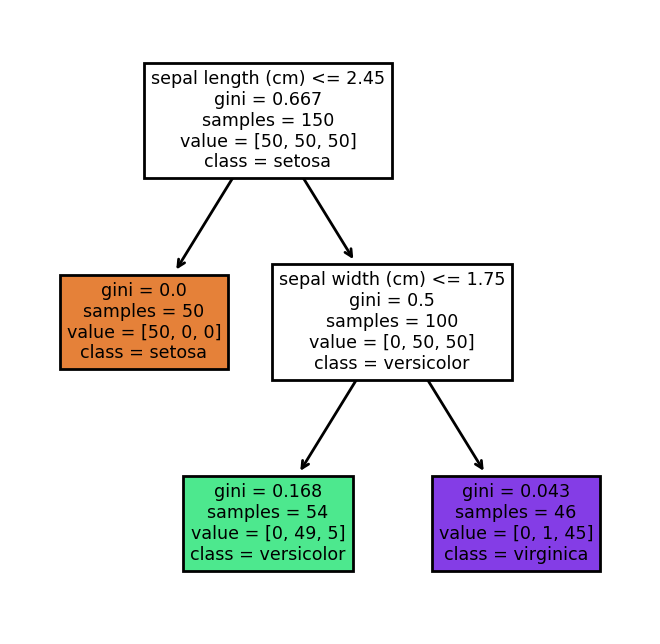

In [3]:
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(tree_clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

### 예측하기
트리가 어떻게 예측을 만들어 내는지 살펴보겠습니다. 새로 발견한 붓꽃의 품종을 분류하려 한다고 가정  
루트노드(깊이가 0인 맨 꼭대기의 노드)에서 시작한다. 이 노드는 꽃잎의 길이가 2.45cm보다 짦은지 검사한다. 
만약 그렇다면 루트 노드에서 왼쪽의 자식노드(깊이 1, 왼쪽노드)로 이동한다. 이 경우 노드가 리프노드(자식 노드를 가지지 않는노드)이므로 추가적인 검사를 하지 않는다. 그냥 노드에 있는 예측 클래스를 보고 결정트리가 새로 발견한 꽃의 품종을 iris-setosa라고 예측

또 다른 꽃을 발견했는데 이번에는 꽃잎의 길이가 2.45cm보다 길다. 루트노드의 오른쪽 자식노드로 이동해야한다.이 노드는 리프노드가 아니라서 추가로 '꽃잎의 너비가 1.75cm 보다 작은지' 검사한다. 만약 그렇다면 이 꽃은 아마도 iris-versicolor일 것이다. 그렇지 않다면 iris-virginica일 것이다. 

**결정트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것이다. 사실 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.**

**지니 불순도**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$

**엔트로피 불순도**

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$


**분류에 대한 CART 비용 함수**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

#### 파라미터 
노드 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린것.   
노드 value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.    
gini 속성은 불순도를 측정한다.  한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini = 0)하다고 한다.

**<결정 트리의 결정 경계> 생성 코드**

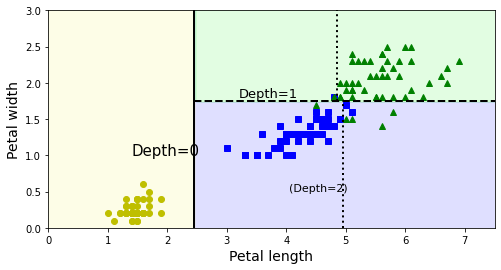

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### 클래스 확률 추정

결정트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다. 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환

In [5]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])